In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
tree = cv2.imread('Data/Tree.jpeg')
tree_RGB = cv2.cvtColor(tree, cv2.COLOR_BGR2RGB)

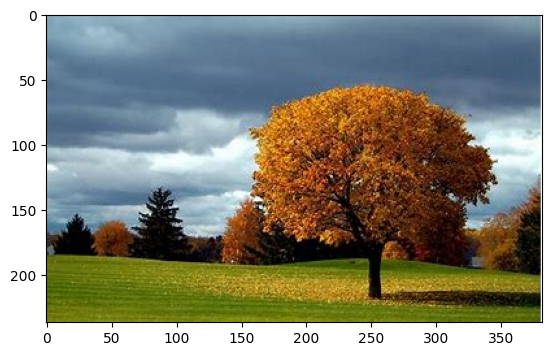

In [25]:
plt.imshow(tree_RGB)

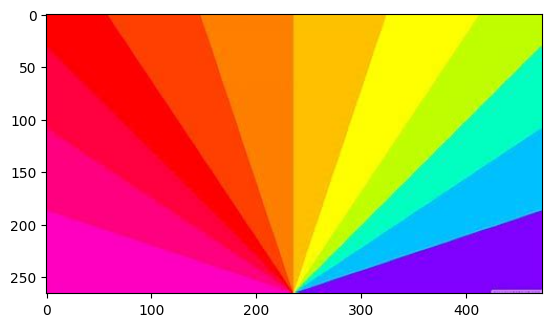

In [26]:
rainbow = cv2.imread('Data/Rainbow.jpeg')
rainbow_RGB = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)
plt.imshow(rainbow_RGB)

Calculate Histogram

In [27]:
# Considering channel[0] -> refers to Blue in CV
rainbow_histogram = cv2.calcHist([rainbow], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
rainbow_histogram.shape

(256, 1)

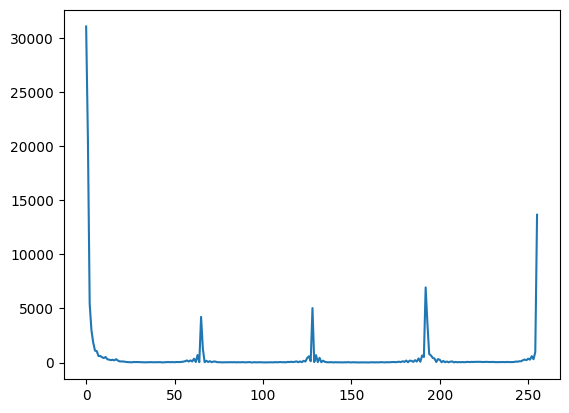

In [28]:
plt.plot(rainbow_histogram)

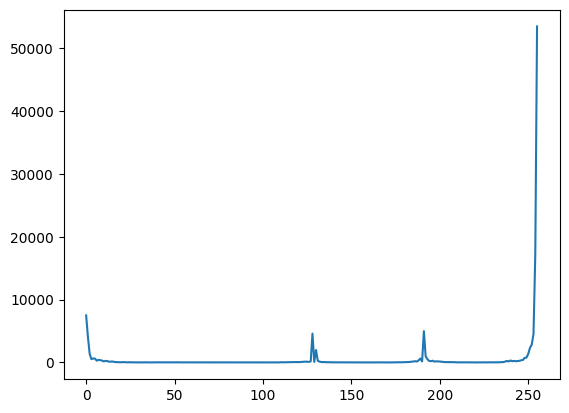

In [29]:
# Lets check for the rainbow RGB
rainbow_RGB_histogram = cv2.calcHist([rainbow_RGB], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(rainbow_RGB_histogram)

Text(0.5, 1.0, 'Histogram for Rainbow')

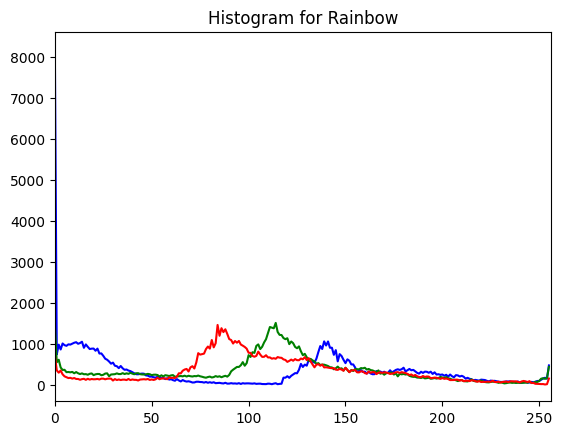

In [30]:
img = tree
color = ('b','g','r')

for i, iColor in enumerate(color):
    hist_red = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist_red, color=iColor)
    plt.xlim([0, 256])
    
plt.title('Histogram for Rainbow')

Histogram Equivalization

In [31]:
img = rainbow
img.shape

(266, 473, 3)

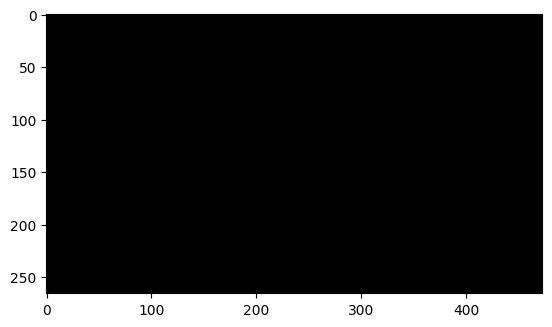

In [32]:
mask = np.zeros(img.shape[:2], np.uint8)
plt.imshow(mask, cmap='gray')


In [33]:
mask.shape

(266, 473)

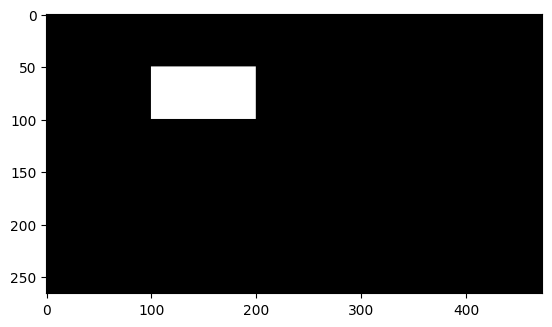

In [34]:
# Let us consider some random pixel and change the color value to white
mask[50:100, 100:200] = 255
plt.imshow(mask, cmap='gray')

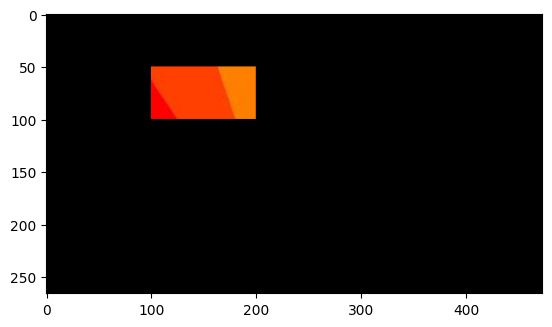

In [35]:
masked_img = cv2.bitwise_and(img, img, mask=mask) # used for histogram calc. purpose
masked_img_RGB = cv2.bitwise_and(rainbow_RGB, rainbow_RGB, mask=mask) # used for visualization purpose
plt.imshow(masked_img_RGB)

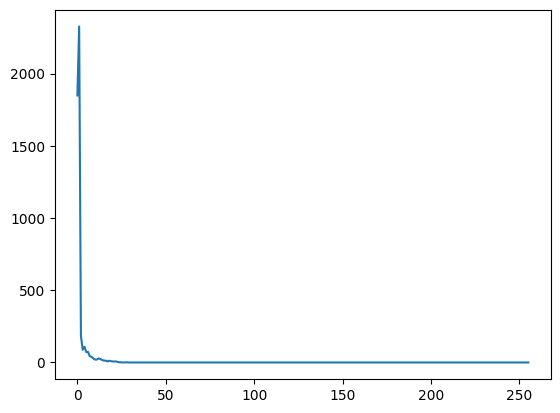

In [36]:
# In CV: Values are in B G R (Note: here channels=[0] -> corresponds to Blue channel)
hist_mask_values_blue = cv2.calcHist([rainbow], channels=[0], mask=mask, histSize=[256], ranges=[0,256])
plt.plot(hist_mask_values_blue)

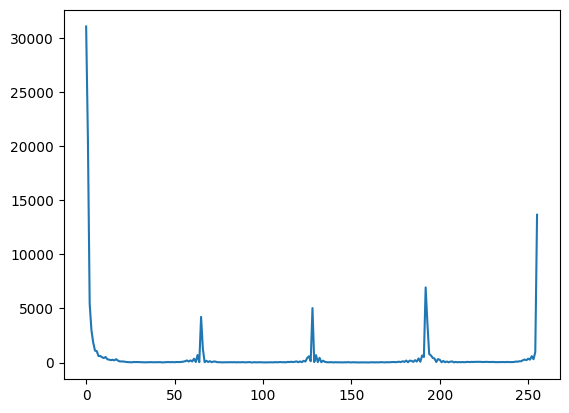

In [37]:
hist_NO_mask_values_blue = cv2.calcHist([rainbow], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_NO_mask_values_blue)

Histogram on Grey Scale Image

In [38]:
puppy_grey = cv2.imread('Data/Puppy.jpg', 0) # read as grey scale
puppy_grey.shape

(1080, 1920)

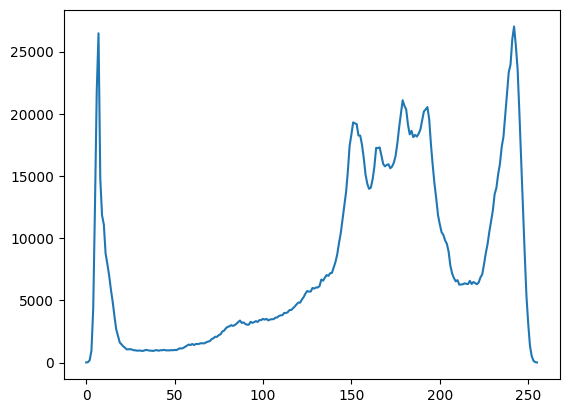

In [39]:
hist_puppy = cv2.calcHist([puppy_grey],channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist_puppy)

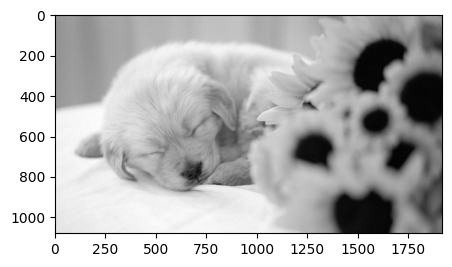

In [44]:
def Display_Img(img, cmap=None):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

Display_Img(puppy_grey, cmap='gray')

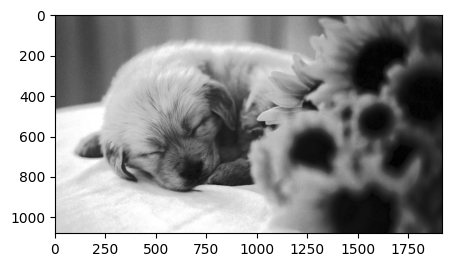

In [41]:
equivalize_puppy = cv2.equalizeHist(puppy_grey)
Display_Img(equivalize_puppy, cmap='gray')

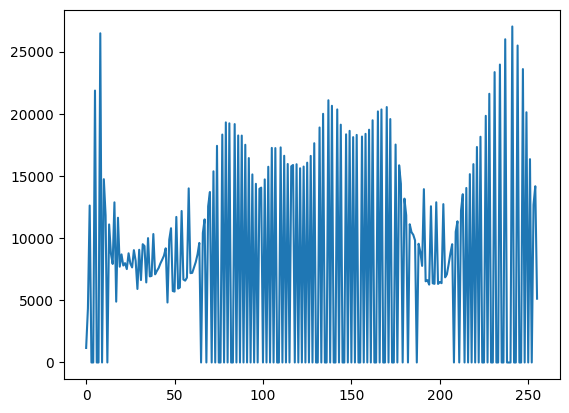

In [45]:
hist_equiv_puppy = cv2.calcHist([equivalize_puppy],channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist_equiv_puppy)

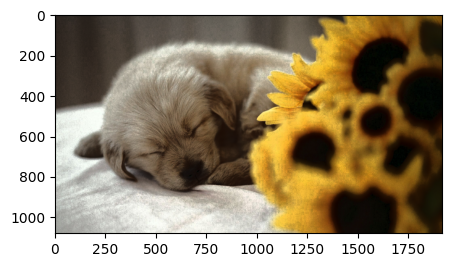

In [46]:
puppy = cv2.imread('Data/Puppy.jpg')
puppy_hsv = cv2.cvtColor(puppy, cv2.COLOR_BGR2HSV) #hue, saturation, value

# Extract the value from hsv
puppy_hsv[:,:,2] = cv2.equalizeHist(puppy_hsv[:,:,2])
equalize_color_puppy = cv2.cvtColor(puppy_hsv, cv2.COLOR_HSV2RGB)
Display_Img(equalize_color_puppy) # here we get more contrast image

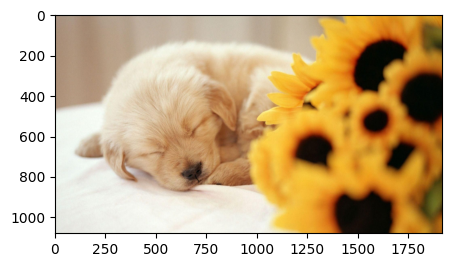

In [47]:
# Let us compare with our origial image
puppy_orig = cv2.cvtColor(puppy, cv2.COLOR_BGR2RGB)
Display_Img(puppy_orig)